=== DATASET OVERVIEW ===
Total samples: 4966
Features: 128 | Target: 1

First 5 rows:
   R1-PA1:VH     R1-PM1:V  R1-PA2:VH     R1-PM2:V   R1-PA3:VH     R1-PM3:V  \
0  70.399324  127673.0908 -49.572308  127648.0176 -169.578319  127723.2374   
1  73.688102  130280.7109 -46.300719  130255.6377 -166.278082  130355.9307   
2  73.733939  130305.7842 -46.254883  130280.7109 -166.232245  130381.0040   
3  74.083443  130581.5902 -45.899649  130556.5169 -165.882741  130656.8100   
4  74.553268  131083.0556 -45.424094  131057.9823 -165.424375  131158.2754   

   R1-PA4:IH   R1-PM4:I  R1-PA5:IH   R1-PM5:I  ...  control_panel_log4  \
0  65.689611  605.91099 -57.003571  626.78553  ...                   0   
1  71.831719  483.59351 -50.947407  500.98896  ...                   0   
2  71.808800  483.59351 -50.913030  500.98896  ...                   0   
3  72.152575  482.86107 -50.437475  499.15786  ...                   0   
4  72.118198  484.50906 -50.013486  497.69298  ...                   0   



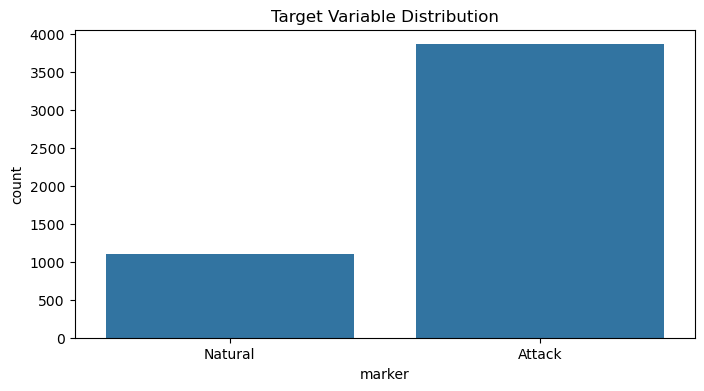


=== MISSING VALUES ===
Missing values per column:
Series([], dtype: int64)

=== NUMERICAL FEATURES ===
Descriptive statistics:
         R1-PA1:VH       R1-PM1:V    R1-PA2:VH       R1-PM2:V    R1-PA3:VH  \
count  4966.000000    4966.000000  4966.000000    4966.000000  4966.000000   
mean    -17.925492  130994.354960     8.610555  131258.159486     1.681621   
std      98.099812    6545.849798   115.044643    2692.553537    96.408966   
min    -179.988962   24998.050190  -179.994691  102449.381200  -179.960314   
25%     -97.404258  131007.835800   -99.085889  130706.956500   -77.405166   
50%     -35.864293  131634.667500    17.077007  131333.788300    14.080438   
75%      71.277382  132136.132900   116.783123  131835.253700    77.995312   
max     179.994691  146302.530500   179.971773  146327.603700   179.966044   

            R1-PM3:V    R1-PA4:IH     R1-PM4:I    R1-PA5:IH     R1-PM5:I  ...  \
count    4966.000000  4966.000000  4966.000000  4966.000000  4966.000000  ...   
mean   

D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


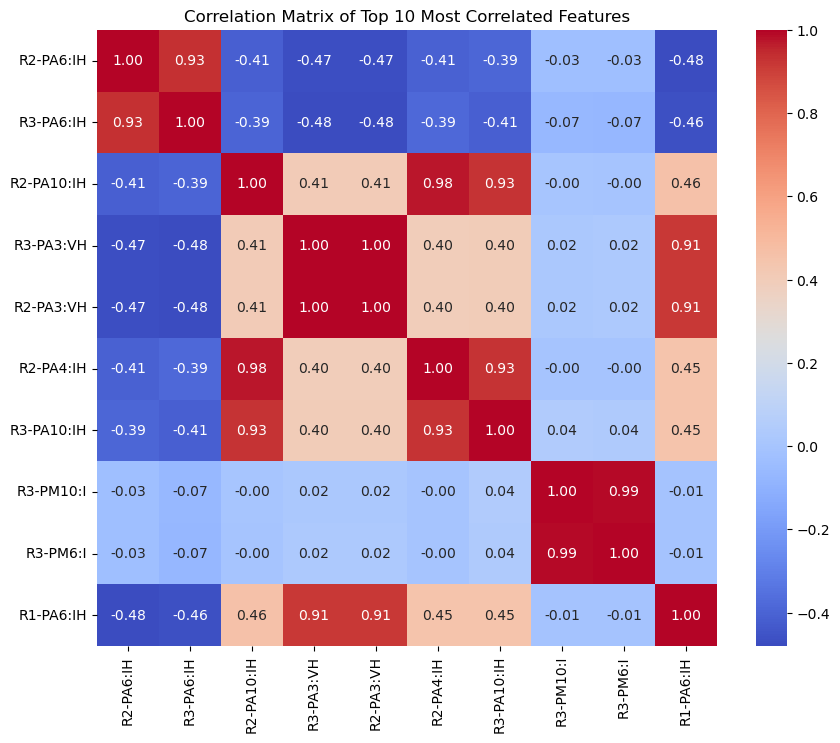

In [1]:
# ==================== STANDALONE EDA CODE ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create directory for plots if it doesn't exist
plot_dir = "eda_plots"
os.makedirs(plot_dir, exist_ok=True)

github_url = "https://raw.githubusercontent.com/haxshita/Power_Grid_Efficiency_Prediction/main/data/data1.csv" 
df = pd.read_csv(github_url)

# 1. Dataset Overview
print("=== DATASET OVERVIEW ===")
print(f"Total samples: {len(df)}")
print(f"Features: {df.shape[1]-1} | Target: 1")
print("\nFirst 5 rows:")
print(df.head())

# 2. Target Analysis
print("\n=== TARGET ANALYSIS ===")
print("Class distribution:")
print(df.iloc[:,-1].value_counts())

plt.figure(figsize=(8,4))
sns.countplot(x=df.iloc[:,-1])
plt.title("Target Variable Distribution")
plt.savefig(f"{plot_dir}/target_distribution.png", bbox_inches='tight', dpi=300)
plt.show()

# 3. Missing Values Analysis
print("\n=== MISSING VALUES ===")
missing = df.isna().sum()
print("Missing values per column:")
print(missing[missing > 0])

# 4. Numerical Features Analysis
num_cols = df.select_dtypes(include=np.number).columns[:-1]  # Exclude target

print("\n=== NUMERICAL FEATURES ===")
print("Descriptive statistics:")
print(df[num_cols].describe())

# 5. Correlation Analysis (Top Features Only)
print("\n=== CORRELATION ANALYSIS ===")
# Calculate correlations with target
corr_with_target = df[num_cols].corrwith(df.iloc[:,-1].map({'Natural':0, 'Attack':1}))
top_corr_features = corr_with_target.abs().sort_values(ascending=False).index[:10]

plt.figure(figsize=(10,8))
sns.heatmap(df[top_corr_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Top 10 Most Correlated Features")
plt.savefig(f"{plot_dir}/correlation_matrix.png", bbox_inches='tight', dpi=300)
plt.show()